<a href="https://colab.research.google.com/github/Djaxis/-Html-Css-Javascript-Projet-1/blob/main/Logistic_regression_PREDICTION_TITANIC_Brice_De_Campos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import plotly.express as px
pd.set_option('mode.chained_assignment', None)
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

Cartographie pour voir à quelle famille chaque algorithme appartient :
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


### Cours
https://odyssey.wildcodeschool.com/quests/815

Vidéos Youtube pour aider :
ML REG LOGISTIC
https://www.youtube.com/watch?v=hNRDLVpzYgI&ab_channel=INTECHWETRUST
Les faiblesses du ML :
https://www.youtube.com/watch?v=qToXVhFWGPg&ab_channel=LeMachineLearningavecDamien

Vous effectuez une classification lorsque vous essayez de prédire une catégorie. Par exemple,


si vous essayez de prédire quelle est la taille de cet animal : c'est une question de régression.
si vous essayez de prédire ce qu'est cet animal : un chien ou un chat ? C'est une question de classification.
Cela semble très simple !


En théorie, on dit qu'un algorithme de régression traite des valeurs numériques, continues et ordonnées. Un algorithme de classification traite des valeurs non-continues et non-ordonnées.


Régression logistique
Comment pourrions-nous techniquement faire cela ? Jouons à un petit jeu. Nous mettons un numéro à chaque catégorie (nous les appellerons classes à partir de maintenant).


chien = 0
chat = 1

Je pourrais donner ces nombres comme cibles pour ma régression linéaire, et voir si j'obtiens un bon résultat

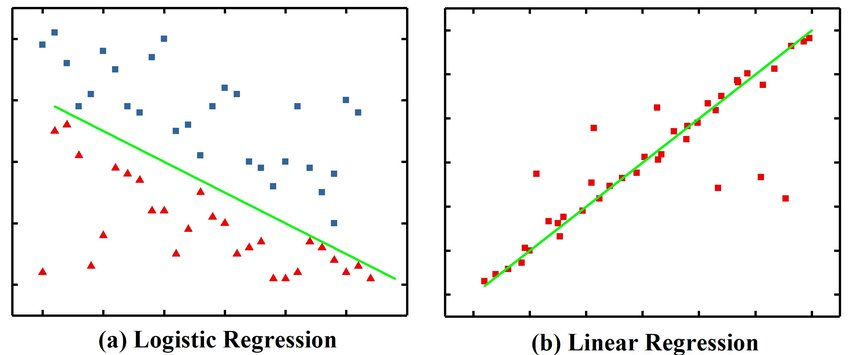

Alors, comment interpréter si ma prédiction est de 0.8 ? On pourrait dire que le modèle n'est pas sûr, mais à 80% ça devrait être un chat. C'est le principe de la régression logistique : on fait des régressions sur la probabilité, et non sur la valeur.

La limite de 50% s'appelle un seuil. Ici, on a un seuil = 0,5.


Ainsi, une régression logistique n'est pas un algorithme de régression, mais un algorithme de classification ! Pourquoi ce nom ? Parce que, techniquement, on applique une régression aux probabilités des catégories.


Pour expliquer cela, regardons ces deux graphiques.


Une régression linéaire essaie de trouver la ligne qui passe le plus près de tous les points. Plus vous êtes proche de la ligne, meilleure est votre prédiction.

Une régression logistique essaie de trouver la ligne qui sépare le plus les deux catégories. Plus vous êtes proche de la ligne, moins vous êtes sûr de votre prédiction (50% pour chaque classe / catégorie).
Plus vous êtes loin de la ligne, plus vous êtes sûr de votre prédiction. La ligne est appelée "frontière de décision"

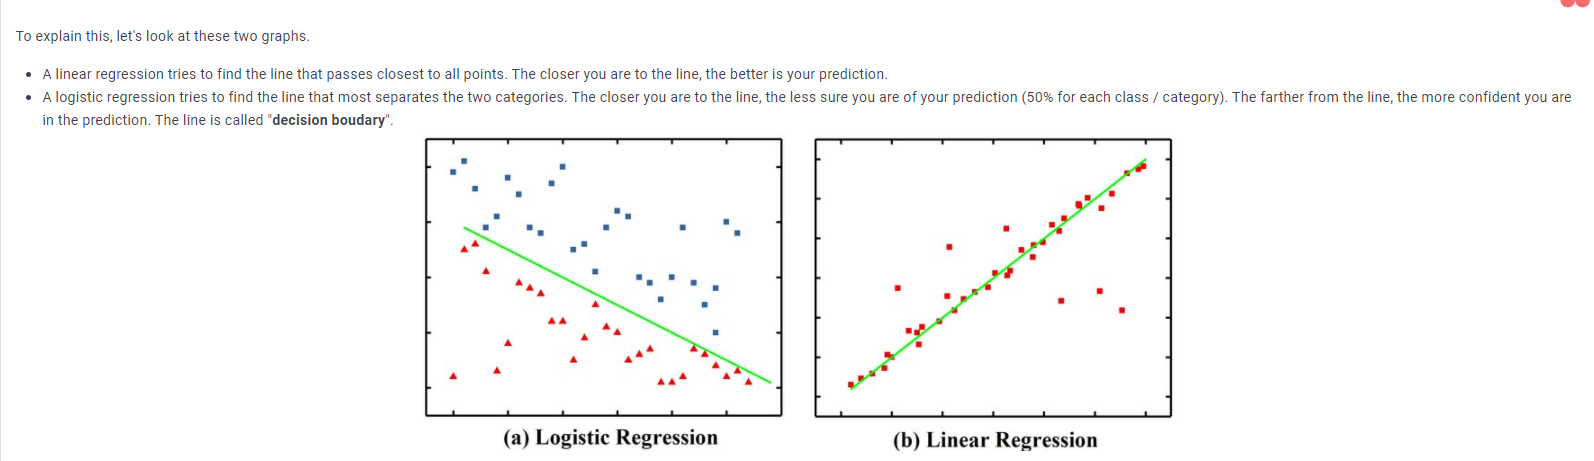

Et comment l'algorithme trouve-t-il la ligne avec la meilleure équation ?

Comme la plupart des algorithmes d'apprentissage automatique, il est basé sur l'essai et l'apprentissage. L'algorithme essaie une équation, puis une autre, puis une autre...

et il garde la meilleure équation. Chaque essai est appelé une "epoch". Quelque chose comme ça :

Chaque epoch est-elle totalement aléatoire ? Non, bien sûr.
Les algorithmes incluent des optimisations pour accélérer la recherche de la meilleure solution.
Actuellement, vous n'avez pas à vous en soucier.


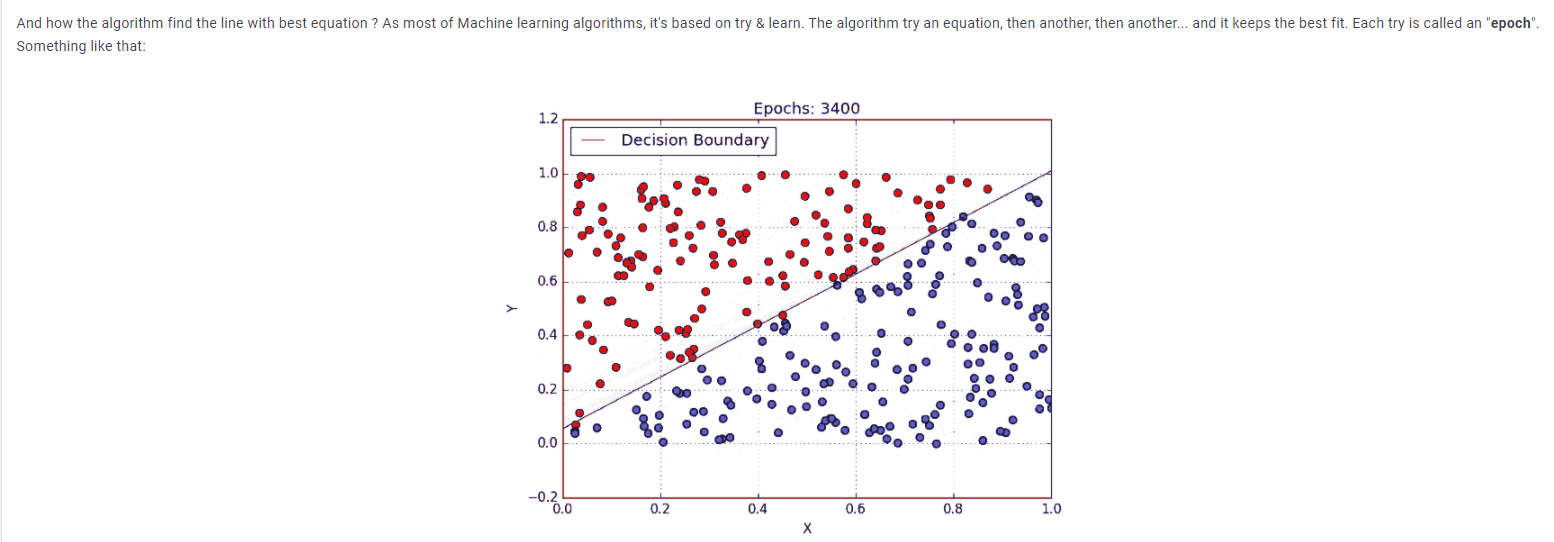


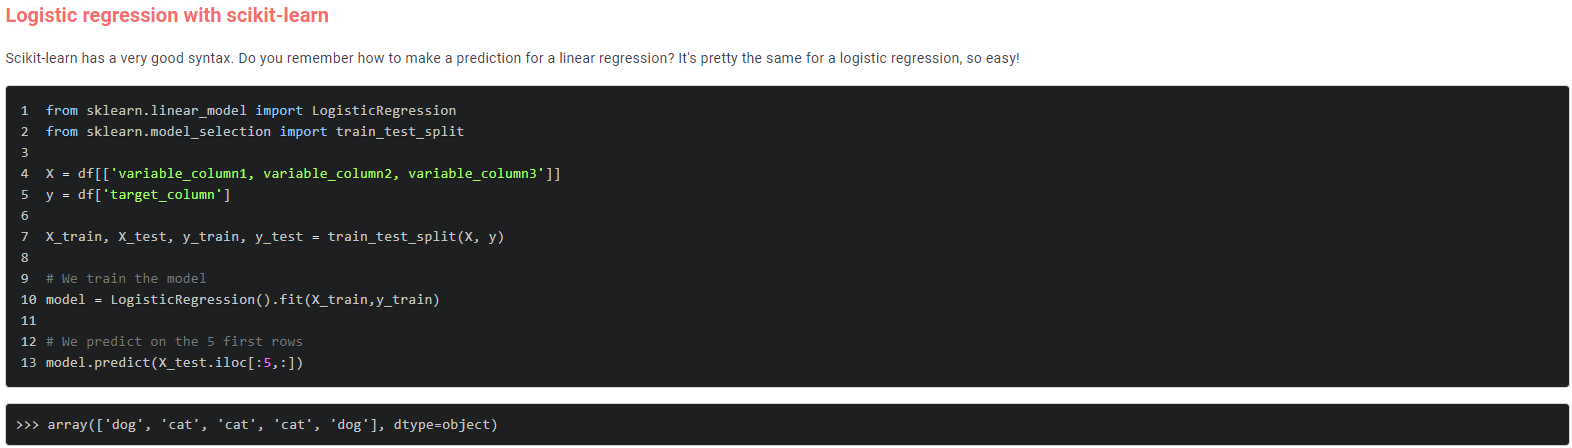

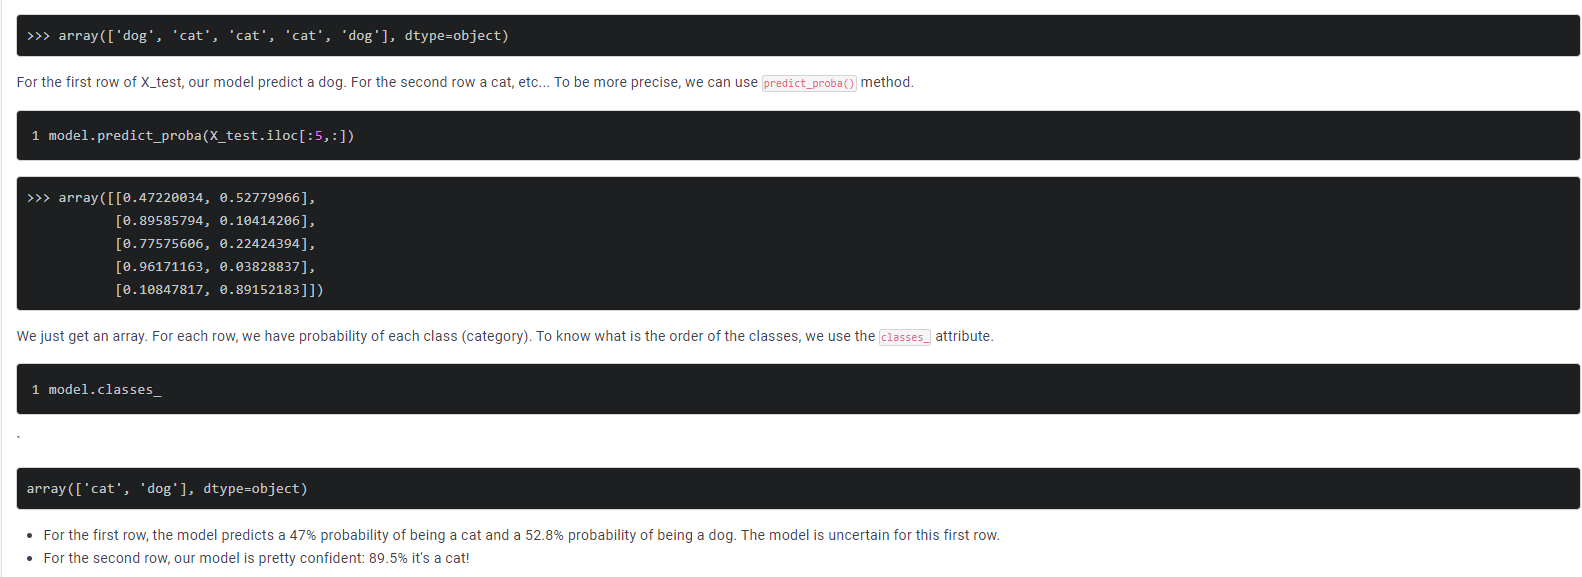

# Execute the code below
You will get a passenger list of the titanic.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import plotly.express as px
pd.set_option('mode.chained_assignment', None)
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns?

In [70]:
# What are the "type" of each column?
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


In [71]:
# First exploration:
df_titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
882      male
883    female
884    female
885      male
886      male
Name: Sex, Length: 887, dtype: object

As a reminder, the variables (X) of a machine learning model must be numerical.
- For "Name", there's not much we can do.
- For "Sex", you will transform the column values into numerical values.

In [72]:
# It's up to you:
df_titanic['Sex']=df_titanic['Sex'].replace(['female','male'],[0,1]) # transform the column values into numerical values.

# on remplace les female par 0 et male par 1
df_titanic['Sex']
# [0]= female , [1] = male

0      1
1      0
2      0
3      0
4      1
      ..
882    1
883    0
884    0
885    1
886    1
Name: Sex, Length: 887, dtype: int64

In [73]:
df_titanic['Survived'].unique()
# il n'y a que 2 type de data 'Dead ' or 'Survived'

array(['Dead', 'Survived'], dtype=object)

In [74]:
df_titanic= df_titanic.rename(columns={'Survived' :'Status'})

In [75]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Status                   887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    int64  
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

<Axes: >

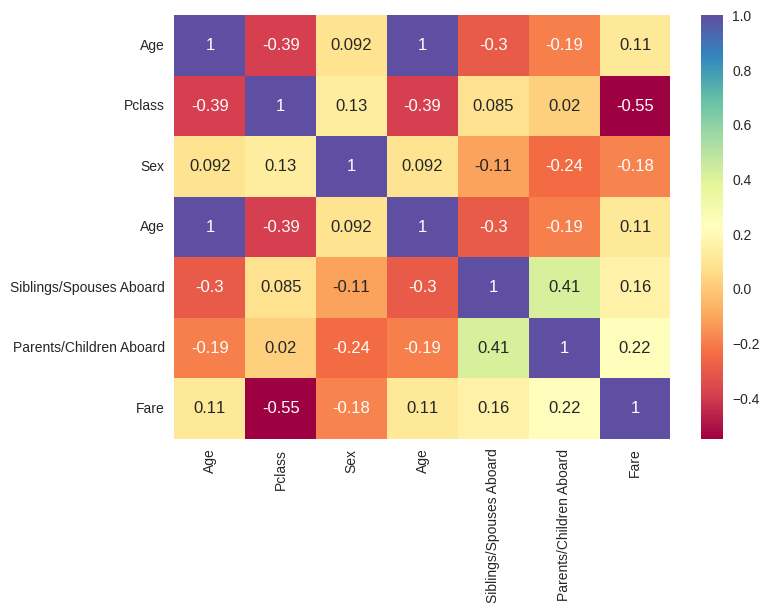

In [76]:
# First exploration:
sns.heatmap(df_titanic[['Age','Pclass','Sex','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']].corr(), cmap='Spectral',annot= True)
#heatmap correlation.

In [77]:
#scatter_matrix (pb avec px)
pairplottita = px.scatter_matrix(df_titanic, dimensions=['Pclass',	'Name',	'Sex',	'Age',	'Siblings/Spouses Aboard',	'Parents/Children Aboard',	'Fare'],
                        color="Status")
pairplottita.update_layout(title="Titanic Pair Plot", dragmode='select', width=1200, height=1000, hovermode='closest')
pairplottita.show()

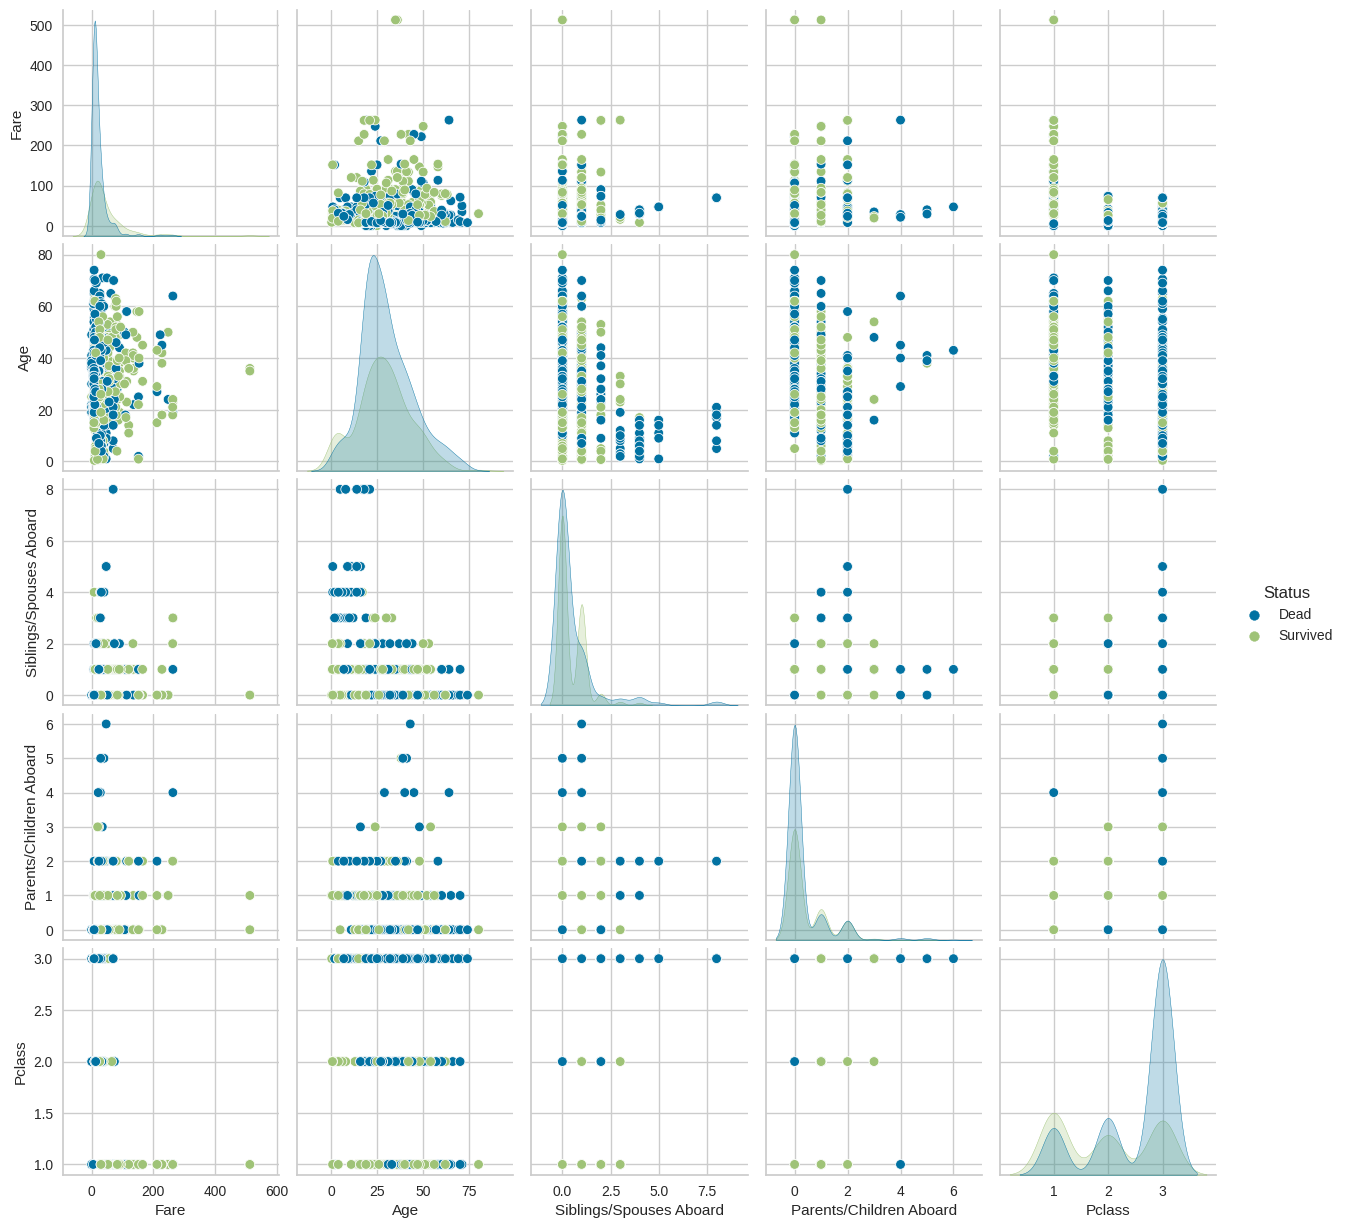

In [78]:
sns.pairplot(data=df_titanic[["Fare","Status","Age","Siblings/Spouses Aboard","Parents/Children Aboard","Pclass"]],
             hue="Status",)

You are looking for Jack. How many people named Jack on board?

In [79]:
df_titanic


,Status,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,Dead,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000
883,Survived,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000
884,Dead,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500
885,Survived,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000


In [80]:
# How many people named Jack on board? COMPTE LE NOMBRE DE FOIS QU'IL Y A LA SUITE STR Jack ou Jacques
Jack = df_titanic['Name'].str.contains('Jack', regex=False).sum()
Jack

1

In [81]:
Jacques = df_titanic['Name'].str.contains('Jacques', regex=False).sum()
Jacques

3

# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers.
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die.

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

Régression logistique
Aujourd'hui, dans cette quête, vous avez un pouvoir extraordinaire : vous pouvez voyager dans le temps pour essayer de sauver certains passagers. Vous vouliez évidemment sauver Jack. Mais vous n'avez pas trouvé son nom sur la liste. Il voyage probablement sous un faux nom... Dommage, grâce à ce voyage, vous allez quand même essayer de sauver autant de personnes que possible. Pour ce faire, vous devez identifier les personnes qui vont probablement mourir.

Sélectionnez les caractéristiques (X) avec uniquement des valeurs numériques, et sans la colonne "Survived".

Sélectionnez la colonne "Survived" comme cible (y).

Divisez vos données avec random_state = 36.

Entraînez une régression logistique.

Affichez le score de précision sur l'ensemble d'entraînement et sur l'ensemble de test.

Y a-t-il du surapprentissage ?

Affichez la Matrice de Confusion sur l'ensemble de test.

Combien d'itérations ont été nécessaires pour entraîner ce modèle ?

In [82]:
# It's up to you:
X = df_titanic[['Pclass','Sex','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']] # Select features (X) with only numeric values, and without "Survived" column
y = df_titanic['Status'] # Select "Survived" column as target (y)
X_train, X_test, y_train, y_test = train_test_split(X , y,  random_state = 36, train_size = 0.75) # Split your data with random_state = 36
X

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
882,2,1,27.0,0,0,13.0000
883,1,0,19.0,0,0,30.0000
884,3,0,7.0,1,2,23.4500
885,1,1,26.0,0,0,30.0000


In [83]:
#affiche moi le y : la colonne y
y

0          Dead
1      Survived
2      Survived
3      Survived
4          Dead
         ...   
882        Dead
883    Survived
884        Dead
885    Survived
886        Dead
Name: Status, Length: 887, dtype: object

In [84]:
print("The lenght of the initial dataset is :", len(X)) # impression du nopmbre de data TOTAL
print("The lenght of the train dataset is   :", len(X_train)) # impression du nopmbre de data TRAIN utilisé.  train_size = 0.75
print("The lenght of the test dataset is    :", len(X_test))# impression du nopmbre de data TEST

The lenght of the initial dataset is : 887
The lenght of the train dataset is   : 665
The lenght of the test dataset is    : 222


In [85]:
#df_titanic['Status']=df_titanic['Status'].replace(['Dead','Survived'],[0,1])
#transformation des data 'Status' en numerical.
#df_titanic['Status']

In [86]:
# Model logistic regression // Train a logistic regression
newmodel = LogisticRegression().fit(X_train, y_train)
newmodel

LogisticRegression()

1. `# Model logistic regression // Train a logistic regression`
   
   Ces lignes sont des commentaires (précédés par le symbole `#`). Ils sont là pour fournir des notes ou des clarifications sur ce que fait le code, mais ils n'ont pas d'effet sur l'exécution du code.

2. `newmodel = LogisticRegression().fit(X_train, y_train)`
   
   - `LogisticRegression()`: Cette partie crée un nouvel objet de régression logistique. La régression logistique est un algorithme de classification utilisé pour prédire une variable binaire (comme "survécu" ou "non survécu" dans ce contexte) basée sur une ou plusieurs variables indépendantes.
   
   - `.fit(X_train, y_train)`: Cette méthode "entraîne" ou "forme" le modèle en utilisant l'ensemble d'entraînement fourni. Ici, `X_train` contient les données des caractéristiques des passagers (comme l'âge, le sexe, etc.), et `y_train` contient la vérité terrain pour ces passagers (s'ils ont survécu ou non). Pendant cette étape d'entraînement, le modèle "apprend" les relations entre les caractéristiques et la survie, afin qu'il puisse faire des prédictions sur de nouvelles données à l'avenir.

3. `newmodel`

   Cette ligne affichera une représentation textuelle du modèle nouvellement formé. Cela inclura généralement les paramètres par défaut et ceux spécifiés lors de la création du modèle. C'est utile pour avoir un aperçu des paramètres utilisés par la régression logistique.

En somme, ce code crée un modèle de régression logistique, l'entraîne sur un ensemble de données d'entraînement, puis affiche les détails de ce modèle. Une fois formé, ce modèle peut être utilisé pour prédire si d'autres passagers du Titanic auraient survécu ou non basé sur leurs caractéristiques.

In [87]:
# résultat
print("\nScore for the Train dataset :", newmodel.score(X_train, y_train))
print("Score for the Test dataset :", newmodel.score(X_test, y_test))


Score for the Train dataset : 0.8165413533834587
Score for the Test dataset : 0.7882882882882883


Cette portion de code concerne l'évaluation de la performance du modèle de régression logistique que vous avez formé précédemment. Voici l'explication :

1. `# résultat`
   
   C'est un commentaire pour indiquer que le code suivant affichera les résultats (scores) du modèle.

2. `print("\nScore for the Train dataset :", newmodel.score(X_train, y_train))`
   
   Cette ligne évalue la performance du modèle sur l'ensemble d'entraînement (`X_train` et `y_train`). Le score est généralement la précision, c'est-à-dire la proportion de prédictions correctes sur le total des prédictions faites.
   
   `newmodel.score(X_train, y_train)` retourne la précision du modèle pour l'ensemble d'entraînement. En d'autres termes, il mesure à quel point le modèle prédit correctement sur les données avec lesquelles il a été formé.

3. `print("Score for the Test dataset :", newmodel.score(X_test, y_test))`
   
   Cette ligne fait la même chose, mais pour l'ensemble de test (`X_test` et `y_test`). L'évaluation sur l'ensemble de test est cruciale car elle donne une idée de la performance du modèle sur de nouvelles données, qu'il n'a jamais vues pendant l'entraînement.
   
   `newmodel.score(X_test, y_test)` retourne la précision du modèle pour l'ensemble de test.

En somme, ce code affiche la précision de votre modèle de régression logistique sur les ensembles d'entraînement et de test. Ces scores vous permettront de voir à quel point le modèle est performant et s'il souffre potentiellement de surapprentissage (si le score d'entraînement est beaucoup plus élevé que le score de test).

# J ne comprend pas le sens de cette phrase : c'est-à-dire la proportion de prédictions correctes sur le total des prédictions faites.
# Comment peut il savoir que les prédictions sont correct ?

Imaginons un exemple simple : vous avez un examen à choix multiples avec 10 questions, et vous répondez correctement à 7 d'entre elles. Votre "score" ou "précision" est de 7/10, soit 70%.

De la même manière, lorsque nous formons un modèle de machine learning, nous utilisons des données pour lesquelles nous connaissons les réponses (dans le cas du Titanic, si un passager a survécu ou non). Une fois le modèle formé, nous lui donnons ces mêmes données et le laissons prédire les réponses. Puisque nous connaissons les vraies réponses, nous pouvons comparer les prédictions du modèle avec ces vraies réponses pour voir combien il a correctement prédit.

Si, sur 100 passagers, le modèle prédit correctement le sort de 80 d'entre eux (en comparant avec les données réelles que nous avons), alors sa précision est de 80/100 = 80%.

Donc, quand on dit "proportion de prédictions correctes sur le total des prédictions faites", cela signifie simplement le nombre de fois où le modèle a eu raison divisé par le nombre total de prédictions qu'il a faites.

Expliquez ces scores.

1. **Score for the Train dataset : 0.8165413533834587**

   Cela signifie que sur l'ensemble d'entraînement, votre modèle a correctement prédit si un passager a survécu ou non environ 81.65% du temps. En d'autres termes, le modèle a fait les bonnes prédictions pour environ 81,65% des passagers de l'ensemble d'entraînement.

2. **Score for the Test dataset : 0.7882882882882883**

   Sur l'ensemble de test, le modèle a correctement prédit le sort des passagers environ 78.83% du temps. L'ensemble de test est crucial car il donne une idée de comment le modèle se comporterait face à de nouvelles données qu'il n'a jamais vues.

La différence entre les deux scores est d'environ 2,8%. C'est un bon signe car les scores sont assez proches l'un de l'autre, ce qui suggère que le modèle est assez bien généralisé et ne souffre pas beaucoup de surapprentissage. Si le score d'entraînement était très élevé (par exemple, >90%) et le score de test beaucoup plus bas (par exemple, <70%), cela aurait été un signe de surapprentissage : le modèle serait trop adapté aux données d'entraînement et aurait du mal à généraliser sur de nouvelles données.

Pour résumer, votre modèle de régression logistique a une précision d'environ 81,65% sur les données avec lesquelles il a été formé et d'environ 78,83% sur des données qu'il n'avait jamais vues auparavant. Ces scores sont assez bons, surtout pour un modèle aussi simple que la régression logistique.

In [88]:
predictions = newmodel.predict(X_test)
predictions

array(['Dead', 'Dead', 'Survived', 'Dead', 'Dead', 'Dead', 'Dead',
       'Survived', 'Survived', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Survived', 'Survived', 'Survived', 'Dead', 'Survived',
       'Dead', 'Survived', 'Dead', 'Dead', 'Dead', 'Survived', 'Dead',
       'Dead', 'Dead', 'Survived', 'Dead', 'Dead', 'Dead', 'Dead',
       'Survived', 'Dead', 'Dead', 'Dead', 'Survived', 'Survived',
       'Survived', 'Dead', 'Dead', 'Survived', 'Dead', 'Survived', 'Dead',
       'Survived', 'Dead', 'Dead', 'Dead', 'Survived', 'Dead', 'Survived',
       'Survived', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Survived', 'Survived', 'Survived', 'Dead',
       'Dead', 'Dead', 'Survived', 'Dead', 'Survived', 'Survived',
       'Survived', 'Survived', 'Dead', 'Survived', 'Dead', 'Survived',
       'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survived', 'Dead',
       'Dead', 'Survived', 'Dead', 'Dead', 'Survived', 'Dead', 'Survived'

1. **`predictions = newmodel.predict(X_test)`**

   Ici, vous demandez à votre modèle (`newmodel`) de faire des prédictions sur l'ensemble de test `X_test`. L'ensemble `X_test` contient les caractéristiques des passagers (comme leur classe, sexe, âge, etc.) sans les réponses (survécu ou non). Le modèle utilise ce qu'il a appris pendant la phase d'entraînement pour faire ces prédictions.

   Les prédictions seront stockées dans la variable `predictions`, qui sera un tableau contenant la prédiction pour chaque passager dans `X_test`. Si le modèle prédit qu'un passager a survécu, la prédiction pour ce passager sera probablement `1` (ou une valeur similaire), et s'il prédit qu'un passager n'a pas survécu, la prédiction sera `0` (ou une valeur similaire, selon comment les données ont été codées).

2. **`predictions`**

   Cette ligne affiche simplement les prédictions stockées dans la variable `predictions`. Si vous exécutez ce code dans un notebook Jupyter ou dans un IDE qui prend en charge les sorties interactives, vous verrez s'afficher les prédictions pour chaque passager dans `X_test`.

En somme, après avoir exécuté ce code, vous aurez une idée des prédictions du modèle pour les passagers dans l'ensemble de test. Ces prédictions peuvent ensuite être comparées aux véritables résultats (contenus dans `y_test`) pour évaluer la performance du modèle, ce qui a été fait précédemment avec la méthode `.score()`.

In [89]:
X_test

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
346,3,1,3.0,1,1,15.9000
458,3,1,34.0,0,0,8.0500
878,3,0,22.0,0,0,10.5167
618,1,1,42.0,1,0,52.5542
178,3,1,36.0,0,0,0.0000
...,...,...,...,...,...,...
345,3,0,34.0,1,0,16.1000
693,3,1,44.0,0,0,8.0500
423,2,0,28.0,1,0,26.0000
19,3,0,22.0,0,0,7.2250


In [90]:
#confusion matrix , à revoir Print the Confusion Matrix on the test set
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = newmodel.predict(X_test)), index = newmodel.classes_ + " actual",columns = newmodel.classes_ + " predicted")

,Dead predicted,Survived predicted
Dead actual,110,19
Survived actual,28,65


In [91]:
# 0 = death , 1 = survived //
newmodel.predict(X_test.iloc[:,:])

array(['Dead', 'Dead', 'Survived', 'Dead', 'Dead', 'Dead', 'Dead',
       'Survived', 'Survived', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Survived', 'Survived', 'Survived', 'Dead', 'Survived',
       'Dead', 'Survived', 'Dead', 'Dead', 'Dead', 'Survived', 'Dead',
       'Dead', 'Dead', 'Survived', 'Dead', 'Dead', 'Dead', 'Dead',
       'Survived', 'Dead', 'Dead', 'Dead', 'Survived', 'Survived',
       'Survived', 'Dead', 'Dead', 'Survived', 'Dead', 'Survived', 'Dead',
       'Survived', 'Dead', 'Dead', 'Dead', 'Survived', 'Dead', 'Survived',
       'Survived', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Survived', 'Survived', 'Survived', 'Dead',
       'Dead', 'Dead', 'Survived', 'Dead', 'Survived', 'Survived',
       'Survived', 'Survived', 'Dead', 'Survived', 'Dead', 'Survived',
       'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survived', 'Dead',
       'Dead', 'Survived', 'Dead', 'Dead', 'Survived', 'Dead', 'Survived'

# Model improvement

You can save all the people that the model will predict as dead. Change the weight of the classes to save all the people at risk.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".


In [92]:
# It's up to you to save everybody:
modelparametre = LogisticRegression(class_weight = {'Survived' : 30, 'Dead': 0}) # Change the weight of the classes
modelparametre.fit(X_train,y_train) # Fit the model on train set and on the test set

LogisticRegression(class_weight={'Dead': 0, 'Survived': 30})

In [93]:
print("score de précision sur le train:",modelparametre.score(X_train, y_train)) #Imprimer le score de précision sur le "train"
print("score de précision sur le test:",modelparametre.score(X_test, y_test)) #et sur l'ensemble de "test"

score de précision sur le train: 0.3744360902255639
score de précision sur le test: 0.4189189189189189


In [94]:
#confusion matrix , à revoir // Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived"
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelparametre.predict(X_test)), index = modelparametre.classes_ + " actual",columns = modelparametre.classes_ + " predicted")

,Dead predicted,Survived predicted
Dead actual,0,129
Survived actual,0,93


# Model improvement, under constraint

Tour time travel boss tells you that there's a budget cut. You now can only save 120 people max.

Modify the weight of the classes to have only 120 people predicted as dead (whether they actually survived or not).

In [95]:
# It's up to you:
# on réajuste les parametres : pour sauver 120 max
modelparametre = LogisticRegression(class_weight = {'Survived' : 68, 'Dead': 32})
modelparametre.fit(X_train,y_train)

LogisticRegression(class_weight={'Dead': 32, 'Survived': 68})

In [96]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelparametre.predict(X_test)), index = modelparametre.classes_ + " actual",columns = modelparametre.classes_ + " predicted")

,Dead predicted,Survived predicted
Dead actual,94,35
Survived actual,20,73


In [97]:
# on a donc 98 + 22 = 120 personnes dont nous previons la fin
# 98+68=166

# People least at risk

You are looking for people most at risk.
- Compute the matrix of prediction probabilities **on your test set**
- Print the list of classes
- Among the previous prediction probability matrix, select only the column corresponding to the "Survived" probability
- Add this "Survived" column in X_test
- Display this X_test DataFrame by sorting the passengers most likely to survive first (`sorted_values()`method ?)

Voici la traduction de vos instructions:

Personnes les moins à risque.
## **Vous recherchez les personnes les plus à risque.**

Calculez la matrice des probabilités de prédiction sur votre ensemble de test.

Affichez la liste des classes.

Parmi la matrice des probabilités de prédiction précédente, sélectionnez uniquement la colonne correspondant à la probabilité "Survived".

Ajoutez cette colonne "Survived" dans X_test.

Affichez ce DataFrame X_test en triant d'abord les passagers les plus susceptibles de survivre (méthode sorted_values() ?).


Note : Vous avez une petite erreur dans le nom de la méthode, c'est "sort_values()" et non "sorted_values()".

In [98]:
# It's up to you:
# on réajuste les parametres : pour sauver 120 max
modelparametre = LogisticRegression(class_weight = {'Survived' : 68, 'Dead': 32})
modelparametre.fit(X_train,y_train)

LogisticRegression(class_weight={'Dead': 32, 'Survived': 68})

For the first row of X_test, our model predict a dog. For the second row a cat, etc... To be more precise, we can use **predict_proba()** method.

In [99]:
# model.predict_proba(X_test.iloc[:5,:])

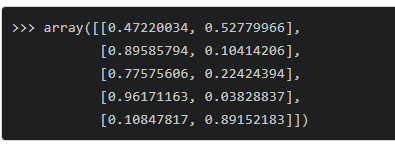

We just get an array. For each row, we have probability of each class (category). To know what is the order of the classes, we use the **classes_** attribute.

**Convertir les probabilités prédites par un modèle en un DataFrame Pandas pour une meilleure visualisation et une manipulation plus facile.**

In [100]:

matrix_proba_titanic = pd.DataFrame(data = modelparametre.predict_proba(X_test), columns = modelparametre.classes_)
# comment mettre en dataframe les predict proba .....
#choix du model.predict_proba( data test ), columns = datachoix.classes_     (on definit le nom des columns avec la function classes_ qui sortira les options )
matrix_proba_titanic


,Dead,Survived
0,0.643842,0.356158
1,0.861604,0.138396
2,0.187133,0.812867
3,0.519016,0.480984
4,0.876652,0.123348
...,...,...
217,0.410065,0.589935
218,0.915297,0.084703
219,0.120597,0.879403
220,0.188514,0.811486


Expliquons chaque étape :

modelparametre.predict_proba(X_test)

La méthode predict_proba est utilisée pour obtenir les probabilités prédites par un modèle pour chaque classe de la variable cible. Pour un problème de classification binaire (comme survivre ou non sur le Titanic), cette méthode renvoie deux probabilités pour chaque observation: la probabilité de la classe 0 (non survécu) et la probabilité de la classe 1 (survécu).

columns = modelparametre.classes_

La propriété classes_ d'un modèle entraîné avec scikit-learn renvoie les classes uniques de la variable cible. Dans le contexte du Titanic, cela renverrait probablement un tableau comme [0, 1] représentant les deux classes possibles (non survécu et survécu).

pd.DataFrame(data = ..., columns = ...)

Vous utilisez le constructeur de DataFrame de Pandas pour convertir les probabilités prédites en un DataFrame. Les probabilités prédites deviennent les données du DataFrame (data), et les noms de colonnes sont définis par les classes uniques (columns).

matrix_proba_titanic

Cette dernière ligne affichera le DataFrame que vous venez de créer. Chaque ligne du DataFrame représente un passager de l'ensemble de test X_test, et chaque colonne contient la probabilité prédite que ce passager appartienne à une classe particulière (non survécu ou survécu).

En exécutant ce code, vous obtiendrez un DataFrame où chaque ligne représente un passager et vous aurez deux colonnes:

La première colonne donne la probabilité que le passager n'ait pas survécu.
La deuxième colonne donne la probabilité que le passager ait survécu.
Le total de ces deux probabilités pour un passager donné sera toujours de 1 (ou très proche en raison de la précision numérique).

In [101]:
#Ajoutez cette colonne "Survived" dans X_test Affichez ce X_test
X_test.reset_index(inplace = True)
X_test

,index,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,346,3,1,3.0,1,1,15.9000
1,458,3,1,34.0,0,0,8.0500
2,878,3,0,22.0,0,0,10.5167
3,618,1,1,42.0,1,0,52.5542
4,178,3,1,36.0,0,0,0.0000
...,...,...,...,...,...,...,...
217,345,3,0,34.0,1,0,16.1000
218,693,3,1,44.0,0,0,8.0500
219,423,2,0,28.0,1,0,26.0000
220,19,3,0,22.0,0,0,7.2250


**Utilisez une méthode pour fusionner **: Plutôt que d'utiliser left_on et right_on avec les indices, vous pouvez simplement concaténer les DataFrames horizontalement si vous êtes sûr de l'ordre des lignes :

In [110]:
#Ajoutez cette colonne "Survived" dans X_test Affichez ce X_test
# fusion de matrix_proba_titanic avecX_test
X_test  =  pd.concat([X_test, matrix_proba_titanic], axis=1)
X_test

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Dead,Survived,Dead,Survived,Dead,Survived
0,3,1,3.0,1,1,15.9000,0.643842,0.356158,0.643842,0.356158,0.643842,0.356158
1,3,1,34.0,0,0,8.0500,0.861604,0.138396,0.861604,0.138396,0.861604,0.138396
2,3,0,22.0,0,0,10.5167,0.187133,0.812867,0.187133,0.812867,0.187133,0.812867
3,1,1,42.0,1,0,52.5542,0.519016,0.480984,0.519016,0.480984,0.519016,0.480984
4,3,1,36.0,0,0,0.0000,0.876652,0.123348,0.876652,0.123348,0.876652,0.123348
...,...,...,...,...,...,...,...,...,...,...,...,...
217,3,0,34.0,1,0,16.1000,0.410065,0.589935,0.410065,0.589935,0.410065,0.589935
218,3,1,44.0,0,0,8.0500,0.915297,0.084703,0.915297,0.084703,0.915297,0.084703
219,2,0,28.0,1,0,26.0000,0.120597,0.879403,0.120597,0.879403,0.120597,0.879403
220,3,0,22.0,0,0,7.2250,0.188514,0.811486,0.188514,0.811486,0.188514,0.811486


In [111]:
# triant les passagers les plus susceptibles de survivre en premier
print(X_test.columns)

Index(['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'Dead', 'Survived', 'Dead',
       'Survived', 'Dead', 'Survived'],
      dtype='object')


In [115]:
#supprimer la colonne index
if 'index' in X_test.columns:
    X_test = X_test.drop(columns=['index'])
X_test

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Dead,Survived,Dead,Survived,Dead,Survived
0,3,1,3.0,1,1,15.9000,0.643842,0.356158,0.643842,0.356158,0.643842,0.356158
1,3,1,34.0,0,0,8.0500,0.861604,0.138396,0.861604,0.138396,0.861604,0.138396
2,3,0,22.0,0,0,10.5167,0.187133,0.812867,0.187133,0.812867,0.187133,0.812867
3,1,1,42.0,1,0,52.5542,0.519016,0.480984,0.519016,0.480984,0.519016,0.480984
4,3,1,36.0,0,0,0.0000,0.876652,0.123348,0.876652,0.123348,0.876652,0.123348
...,...,...,...,...,...,...,...,...,...,...,...,...
217,3,0,34.0,1,0,16.1000,0.410065,0.589935,0.410065,0.589935,0.410065,0.589935
218,3,1,44.0,0,0,8.0500,0.915297,0.084703,0.915297,0.084703,0.915297,0.084703
219,2,0,28.0,1,0,26.0000,0.120597,0.879403,0.120597,0.879403,0.120597,0.879403
220,3,0,22.0,0,0,7.2250,0.188514,0.811486,0.188514,0.811486,0.188514,0.811486


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

# More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?

**Plus de prédictions**

-Est-ce que le révérend "Rev. Juozas Montvila" a de meilleures chances de survie que "Mrs. William (Margaret Norton) Rice" ?

- Filtrez le DataFrame initial pour n'obtenir que les 2 lignes correspondant aux 2 personnes mentionnées ci-dessus, et uniquement les colonnes présentes dans vos variables (X).

- Faites une prédiction avec probabilité pour ces 2 personnes.
- Laquelle a le plus de chances de survivre ?


In [ ]:
df_titanic

In [125]:
print(df_titanic.columns)

Index(['Status', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


# **Je sélèctionne mes prénoms :**

In [126]:
#list of the two names
names = ['Rev. Juozas Montvila','Mrs. William (Margaret Norton) Rice' ]

#selection of the rows matching with both names
selection = df_titanic[df_titanic['Name'].isin(names)][['Pclass', 'Name','Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare']]

selection

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
881,3,Mrs. William (Margaret Norton) Rice,0,39.0,0,5,29.125
882,2,Rev. Juozas Montvila,1,27.0,0,0,13.000


In [119]:
#prediction with probability
modelparametre.predict_proba(selection)

array([[0.40040006, 0.59959994],
       [0.54092245, 0.45907755]])

Le résultat `modelparametre.predict_proba(selection)` retourne un tableau de probabilités pour chaque individu. Chaque ligne du tableau correspond à un individu et chaque colonne à une classe. Dans le contexte de la survie sur le Titanic (et en supposant que la première colonne correspond à "Ne pas survivre" et la deuxième à "Survivre") :

- Pour le premier individu (probablement "Rev. Juozas Montvila"):
  - Il y a une probabilité de 40.04% (ou 0.40040006) qu'il ne survive pas.
  - Il y a une probabilité de 59.96% (ou 0.59959994) qu'il survive.

- Pour le deuxième individu (probablement "Mrs. William (Margaret Norton) Rice"):
  - Il y a une probabilité de 54.09% (ou 0.54092245) qu'il ne survive pas.
  - Il y a une probabilité de 45.91% (ou 0.45907755) qu'il survive.

Sur la base de ces probabilités, "Rev. Juozas Montvila" a une meilleure chance de survie que "Mrs. William (Margaret Norton) Rice".

# **La propriété classes_** d'un modèle entraîné avec scikit-learn vous donne l'ordre des classes étiquetées. C'est utile pour comprendre les sorties de méthodes comme predict_proba qui renvoient des probabilités pour chaque classe, mais sans indiquer explicitement à quelle classe correspond chaque probabilité.

In [130]:
modelparametre.classes_

array(['Dead', 'Survived'], dtype=object)

In [131]:
print(modelparametre.classes_)

['Dead' 'Survived']


In [121]:
#matrix of probability
matrix_proba_2 = pd.DataFrame(data = modelparametre.predict_proba(selection), columns = modelparametre.classes_)
matrix_proba_2.head()

,Dead,Survived
0,0.400400,0.599600
1,0.540922,0.459078


In [122]:
#we add the column name
proba_survived = df_titanic[df_titanic['Name'].isin(names)][['Pclass', 'Name','Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare']]
proba_survived

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
881,3,Mrs. William (Margaret Norton) Rice,0,39.0,0,5,29.125
882,2,Rev. Juozas Montvila,1,27.0,0,0,13.000


In [123]:
proba_survived.reset_index(inplace = True)

In [133]:
# Concaténation horizontale (ajout des colonnes de matrix_proba_2 à la droite de proba_survived)
resultat_horizontal = pd.concat([proba_survived, matrix_proba_2], axis=1)
resultat_horizontal

,index,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Dead,Survived
0,881,3,Mrs. William (Margaret Norton) Rice,0,39.0,0,5,29.125,0.400400,0.599600
1,882,2,Rev. Juozas Montvila,1,27.0,0,0,13.000,0.540922,0.459078


CREER DES INPUT AVEC COMME ENTREES  'Pclass','Sex', 'Age', 'Siblings/Spouses Aboard','Parents/Children Aboard', 'Fare'

In [ ]:
# Récupération des entrées de l'utilisateur
pclass = int(input("Entrez la classe (1, 2 ou 3) : "))
sex = input("Entrez le sexe (male ou female) : ")
age = float(input("Entrez l'âge : "))
siblings_spouses = int(input("Entrez le nombre de frères/sœurs ou conjoints à bord : "))
parents_children = int(input("Entrez le nombre de parents/enfants à bord : "))
fare = float(input("Entrez le tarif : "))

# Création d'un DataFrame à partir des entrées
import pandas as pd
data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'Siblings/Spouses Aboard': [siblings_spouses],
    'Parents/Children Aboard': [parents_children],
    'Fare': [fare]
})

# Prédiction à l'aide du modèle
# Assurez-vous que le modèle est déjà formé et que le DataFrame est prétraité de la même manière que les données d'entraînement.
probabilities = modelparametre.predict_proba(data)
print(f"Probabilité de ne pas survivre: {probabilities[0][0]*100:.2f}%")
print(f"Probabilité de survivre: {probabilities[0][1]*100:.2f}%")
